# Neural Networks

## Import relevant modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load the datasets from the internet

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

## Normalize values

In [3]:
# Calculate the Z-scores of each column in the "test set"
test_df_mean = test_df.mean()
test_df_std  = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

# Calculate the Z-scores of each column in the "training set"
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

## Define plotting function

In [13]:
def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
    plt.show()  

## Define a deep neural net model

In [18]:
def create_model(my_learning_rate, my_feature_layer):
    """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)

  # Define the first hidden layer with 20 nodes.   
    model.add(tf.keras.layers.Dense(units=20, 
                                    activation='relu', 
                                    name='Hidden1'))
  
  # Define the second hidden layer with 12 nodes. 
    model.add(tf.keras.layers.Dense(units=12, 
                                    activation='relu', 
                                    name='Hidden2'))
  
  # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,  
                                    name='Output'))                              
  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

def train_model(model, dataset, epochs, label_name, batch_size=None):
    """Train the model by feeding it data."""

  # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
  
  # To track the progression of training, gather a snapshot of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse

## Call the functions (to build and train a deep neural net)

Epoch 1/20


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.6464 - mean_squared_error: 0.6464
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3789 - mean_squared_error: 0.3789
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3459 - mean_squared_error: 0.3459
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3378 - mean_squared_error: 0.3378
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3361 - mean_squared_error: 0.3361
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3345 - mean_squared_error: 0.3345
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3329 - mean_squared_error: 0.3329
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3321 - mean_squared_error: 0.3321
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3320 - mean_squared_error: 0.3320
Epoch 10/20
17/17 [====================

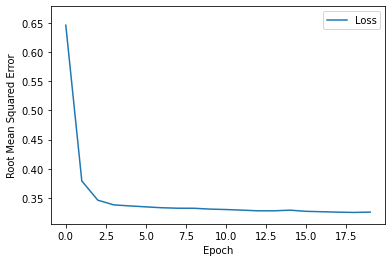


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 5ms/step - loss: 0.3685 - mean_squared_error: 0.3685


[0.3684904873371124, 0.3684904873371124]

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model against the test set.
print("\n Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

## Regularize the deep neural network

In [19]:
# The following "solution" uses L2 regularization to bring training loss and test loss closer to each other. Many, many other solutions are possible.

def create_model(my_learning_rate, my_feature_layer):
    """Create and compile a simple linear regression model."""

  # Discard any pre-existing version of the model.
    model = None

  # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)

  # Describe the topography of the model. 

  # Implement L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                    activation='relu',
                                    kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                    name='Hidden1'))
  
  # Implement L2 regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=12, 
                                    activation='relu', 
                                    kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                    name='Hidden2'))

  # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,  
                                    name='Output'))                              
  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

    return model     
  
def train_model(model, dataset, epochs, label_name, batch_size=None):
    """Train the model by feeding it data."""

  # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
  
  # To track the progression of training, gather a snapshot of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse

## Call the model functions.

Epoch 1/140
17/17 [==============================] - 1s 4ms/step - loss: 1.9012 - mean_squared_error: 0.8246
Epoch 2/140
17/17 [==============================] - 0s 6ms/step - loss: 0.7820 - mean_squared_error: 0.4573
Epoch 3/140
17/17 [==============================] - 0s 7ms/step - loss: 0.5676 - mean_squared_error: 0.4014
Epoch 4/140
17/17 [==============================] - 0s 6ms/step - loss: 0.4949 - mean_squared_error: 0.3875
Epoch 5/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4631 - mean_squared_error: 0.3761
Epoch 6/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4480 - mean_squared_error: 0.3718
Epoch 7/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4396 - mean_squared_error: 0.3703
Epoch 8/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4348 - mean_squared_error: 0.3695
Epoch 9/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4316 - mean_squared_error: 0.3673
Epoch 10/140
17/17 

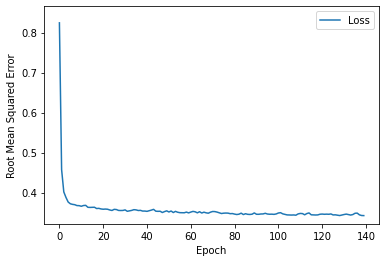


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 5ms/step - loss: 0.4063 - mean_squared_error: 0.3746


[0.4063159227371216, 0.3745569586753845]

In [20]:
# The following variables are the hyperparameters.
learning_rate = 0.007
epochs = 140
batch_size = 1000

label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
plot_the_loss_curve(epochs, mse)

print("\n Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size) 